In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn import metrics
from geopy.distance import great_circle
import time
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import math

%matplotlib inline

# Lectura y procesamiento del excel de los sitios e incidencias

In [2]:
df_distancia = pd.read_csv('base_sitios_resumida.csv')
print(df_distancia)

        Latitud   Longitud  zona.1 Primera fecha: Nemónico (Código único)
0    -12.410040 -76.776040  Zona 2                                LI05791
1    -12.397500 -76.778400  Zona 2                                LI01205
2    -12.310530 -76.842050  Zona 2                                LI00586
3    -12.309090 -76.819720  Zona 2                                LI06074
4    -12.302102 -76.849823  Zona 2                                LI00392
...         ...        ...     ...                                    ...
2184 -11.771100 -77.171500  Zona 3                                LI01181
2185 -11.761515 -77.160211  Zona 3                                LI05687
2186 -11.754558 -77.155132     NaN                                LI05566
2187 -11.747118 -77.164917  Zona 3                                LI01696
2188 -11.746600 -77.150440  Zona 3                                LI06811

[2189 rows x 4 columns]


In [3]:
df_distancia = df_distancia.rename(columns = {"Primera fecha: Nemónico (Código único)":"ID_sitios"})
df_distancia = df_distancia.rename(columns = {"zona.1":"zona"})

df_distancia

,Latitud,Longitud,zona,ID_sitios
0,-12.410040,-76.776040,Zona 2,LI05791
1,-12.397500,-76.778400,Zona 2,LI01205
2,-12.310530,-76.842050,Zona 2,LI00586
3,-12.309090,-76.819720,Zona 2,LI06074
4,-12.302102,-76.849823,Zona 2,LI00392
...,...,...,...,...
2184,-11.771100,-77.171500,Zona 3,LI01181
2185,-11.761515,-77.160211,Zona 3,LI05687
2186,-11.754558,-77.155132,NaN,LI05566
2187,-11.747118,-77.164917,Zona 3,LI01696


In [4]:
df_incidencias = pd.read_excel('Incidencias.xlsx')
df_incidencias.columns

Index(['Nº OS', 'Tipo OS', 'Especialidad OS', 'Alarma OS', 'Fecha creación OS',
       'Fecha programada OS', 'Fecha ingreso sitio', 'Fecha salida sitio',
       'Fecha finalización OS', 'Descripcion OS', 'Estado proceso OS',
       'Estado OS', 'Motivo anulada', 'Emplazamiento', 'Nombre EMP.',
       'Dueño de Torre EMP.', 'Región EMP.', 'TIPO SITIO HISPAM', 'Zona geog',
       'tipo atencion NUEVA', 'MES'],
      dtype='object')

In [5]:
print(len(df_incidencias["Nº OS"]))

27023


## K_means algoritmo

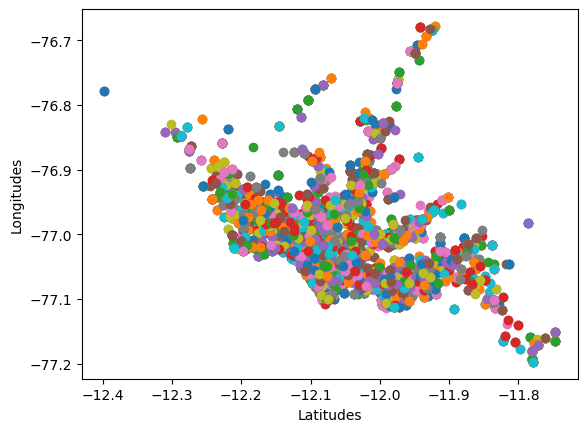

In [6]:
data_kmeans = []
latitudes = []
longitudes = []
zonas = []
df = pd.DataFrame()
for incidencia in df_incidencias['Emplazamiento']:
    if incidencia in df_distancia['ID_sitios'].values:
        latitud = df_distancia.loc[df_distancia['ID_sitios'] == incidencia, 'Latitud'].values[0]
        longitud = df_distancia.loc[df_distancia['ID_sitios'] == incidencia, 'Longitud'].values[0]
        zona = df_distancia.loc[df_distancia['ID_sitios'] == incidencia, 'zona'].values[0]
        latitudes.append(latitud)
        longitudes.append(longitud)
        zonas.append(zona)
        data_kmeans.append([latitud, longitud])
        plt.scatter(latitud,longitud)
        plt.xlabel('Latitudes')
        plt.ylabel('Longitudes')

In [7]:
df['latitudes'] =  latitudes
df['longitudes'] = longitudes
df['zona'] = zonas

Text(0, 0.5, 'Sum of Squared Error (SSE)')

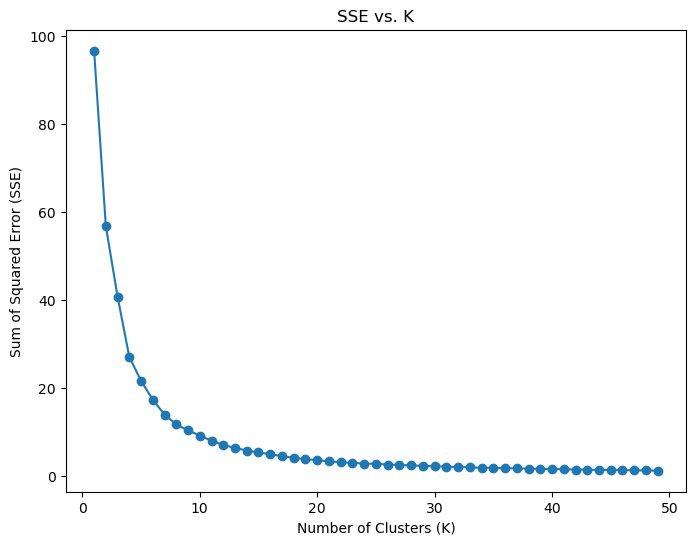

In [8]:

sse = []

k_rng = range(1, 50) 

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data_kmeans) 
    sse.append(km.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_rng, sse, marker='o', linestyle='-')
plt.title('SSE vs. K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Error (SSE)')

In [9]:
km = KMeans(n_clusters=10)
y_predicted = km.fit_predict(data_kmeans)
y_predicted

df['c'] = y_predicted

In [10]:
centroids = km.cluster_centers_
centroids[0]

array([-12.07866521, -77.03930915])

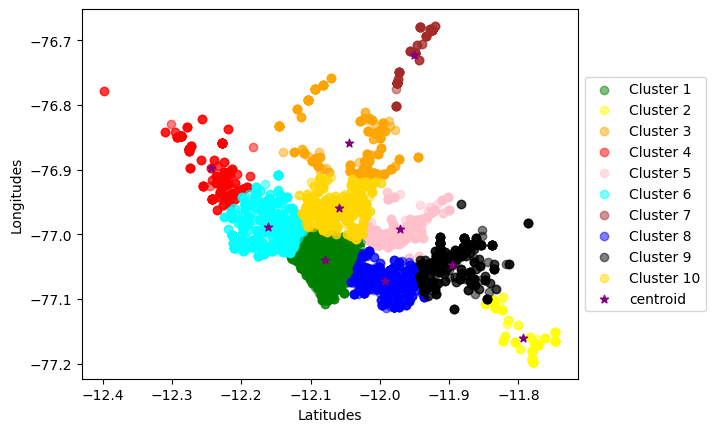

In [11]:
df1 = df[df.c==0]
df2 = df[df.c==1]
df3 = df[df.c==2]
df4 = df[df.c==3]
df5 = df[df.c==4]
df6 = df[df.c==5]
df7 = df[df.c==6]
df8 = df[df.c==7]
df9 = df[df.c==8]
df10 = df[df.c==9]
alpha_value = 0.5

plt.scatter(df1['latitudes'],df1['longitudes'],color='green',label='Cluster 1', alpha=alpha_value)
plt.scatter(df2['latitudes'],df2['longitudes'],color='yellow', label='Cluster 2',alpha=alpha_value)
plt.scatter(df3['latitudes'],df3['longitudes'],color='orange',label='Cluster 3', alpha=alpha_value)
plt.scatter(df4['latitudes'],df4['longitudes'],color='red',label='Cluster 4', alpha=alpha_value)
plt.scatter(df5['latitudes'],df5['longitudes'],color='pink',label='Cluster 5', alpha=alpha_value)
plt.scatter(df6['latitudes'],df6['longitudes'],color='cyan',label='Cluster 6', alpha=alpha_value)
plt.scatter(df7['latitudes'],df7['longitudes'],color='brown',label='Cluster 7',alpha=alpha_value)
plt.scatter(df8['latitudes'],df8['longitudes'],color='blue',label='Cluster 8', alpha=alpha_value)
plt.scatter(df9['latitudes'],df9['longitudes'],color='black',label='Cluster 9',alpha=alpha_value)
plt.scatter(df10['latitudes'],df10['longitudes'],color='gold',label='Cluster 10',alpha=alpha_value)


#plt.scatter(dfb['latitud'],dfb['longitud'],color='red', label='Zona 1', marker = '+' )
#plt.scatter(dfc['latitud'],dfc['longitud'],color='red', label='Zona 2', marker = '+' )
#plt.scatter(dfd['latitud'],dfd['longitud'],color='red', label='Zona 3', marker = '+' )
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Latitudes')
plt.ylabel('Longitudes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [13]:
# Se calcula el número de puntos por cada cluster

data_centroides = {
    'Cluster': [],
    'Latitud': [],
    'Longitud':[],
    'Cluster_Count': []
    
}

cluster_labels = km.labels_
from collections import Counter
cluster_counts = dict(Counter(cluster_labels))
cluster_counts
for i in range(10):
    data_centroides['Cluster'].append(i)
    data_centroides['Latitud'].append(centroids[i][0])
    data_centroides['Longitud'].append(centroids[i][1])
    data_centroides['Cluster_Count'].append(cluster_counts[i])
    
    print(f'Para el cluster {i} se tiene las coordenadas {centroids[i]} con n {cluster_counts[i]}')

    df_cluster_info = pd.DataFrame(data_centroides)
    

Para el cluster 0 se tiene las coordenadas [-12.07866521 -77.03930915] con n 1759
Para el cluster 1 se tiene las coordenadas [-11.79258835 -77.16028681] con n 176
Para el cluster 2 se tiene las coordenadas [-12.04512317 -76.85871394] con n 321
Para el cluster 3 se tiene las coordenadas [-12.24338381 -76.89693142] con n 332
Para el cluster 4 se tiene las coordenadas [-11.97155637 -76.99223482] con n 393
Para el cluster 5 se tiene las coordenadas [-12.16126648 -76.9880177 ] con n 889
Para el cluster 6 se tiene las coordenadas [-11.95055795 -76.72223019] con n 115
Para el cluster 7 se tiene las coordenadas [-11.99248568 -77.0723915 ] con n 647
Para el cluster 8 se tiene las coordenadas [-11.89616353 -77.04667507] con n 552
Para el cluster 9 se tiene las coordenadas [-12.05946863 -76.95905725] con n 756


In [14]:
df

,latitudes,longitudes,zona,c
0,-12.179665,-77.015026,Zona 2,5
1,-11.874043,-77.014860,Zona 3,8
2,-12.213259,-76.937821,Zona 2,3
3,-12.075156,-76.974237,Zona 2,9
4,-12.066750,-77.010973,Zona 3,0
...,...,...,...,...
5935,-11.889200,-77.037400,Zona 3,8
5936,-12.157389,-77.015950,Zona 2,5
5937,-12.093038,-76.960201,Zona 2,9
5938,-11.981300,-76.984300,Zona 3,4


In [15]:
df_cluster_info

,Cluster,Latitud,Longitud,Cluster_Count
0,0,-12.078665,-77.039309,1759
1,1,-11.792588,-77.160287,176
2,2,-12.045123,-76.858714,321
3,3,-12.243384,-76.896931,332
4,4,-11.971556,-76.992235,393
5,5,-12.161266,-76.988018,889
6,6,-11.950558,-76.722230,115
7,7,-11.992486,-77.072391,647
8,8,-11.896164,-77.046675,552
9,9,-12.059469,-76.959057,756


In [16]:

################################################################################################################################
def haversine_distance(lat1, lon1, lat2, lon2):
  
    earth_radius = 6371.0
    
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance = earth_radius * c
    
    return distance


def cluster_center_to_farthest_point_distance(cluster_points):
    # Calculate the center of the cluster
    center_lat = sum(point[0] for point in cluster_points) / len(cluster_points)
    center_lon = sum(point[1] for point in cluster_points) / len(cluster_points)

    max_distance = 0
    for point in cluster_points:
        distance = haversine_distance(center_lat, center_lon, point[0], point[1])
        max_distance = max(max_distance, distance)
    
    return max_distance





In [17]:
# Assuming you have a list of DataFrames, e.g., df_list, where each DataFrame corresponds to a cluster
df_list = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]

distance_per_cluster = []
distance_km = []
for i, df in enumerate(df_list, start=1):
    cluster_points = list(zip(df['latitudes'], df['longitudes']))
    max_distance = cluster_center_to_farthest_point_distance(cluster_points)
    print(f"La distancia entre el centro del cluster {i} y el punto más lejano es {max_distance:.2f} kilometers.")
    distance_per_cluster.append(max_distance)
df_cluster_info['distancia_km'] =distance_per_cluster

La distancia entre el centro del cluster 1 y el punto más lejano es 7.47 kilometers.
La distancia entre el centro del cluster 2 y el punto más lejano es 8.45 kilometers.
La distancia entre el centro del cluster 3 y el punto más lejano es 11.54 kilometers.
La distancia entre el centro del cluster 4 y el punto más lejano es 21.44 kilometers.
La distancia entre el centro del cluster 5 y el punto más lejano es 9.51 kilometers.
La distancia entre el centro del cluster 6 y el punto más lejano es 8.81 kilometers.
La distancia entre el centro del cluster 7 y el punto más lejano es 9.15 kilometers.
La distancia entre el centro del cluster 8 y el punto más lejano es 6.81 kilometers.
La distancia entre el centro del cluster 9 y el punto más lejano es 14.04 kilometers.
La distancia entre el centro del cluster 10 y el punto más lejano es 8.06 kilometers.


In [18]:
df_cluster_info

,Cluster,Latitud,Longitud,Cluster_Count,distancia_km
0,0,-12.078665,-77.039309,1759,7.467001
1,1,-11.792588,-77.160287,176,8.450761
2,2,-12.045123,-76.858714,321,11.535173
3,3,-12.243384,-76.896931,332,21.435486
4,4,-11.971556,-76.992235,393,9.513741
5,5,-12.161266,-76.988018,889,8.805730
6,6,-11.950558,-76.722230,115,9.147556
7,7,-11.992486,-77.072391,647,6.812810
8,8,-11.896164,-77.046675,552,14.038824
9,9,-12.059469,-76.959057,756,8.059173


# # Visualizacion de zonas

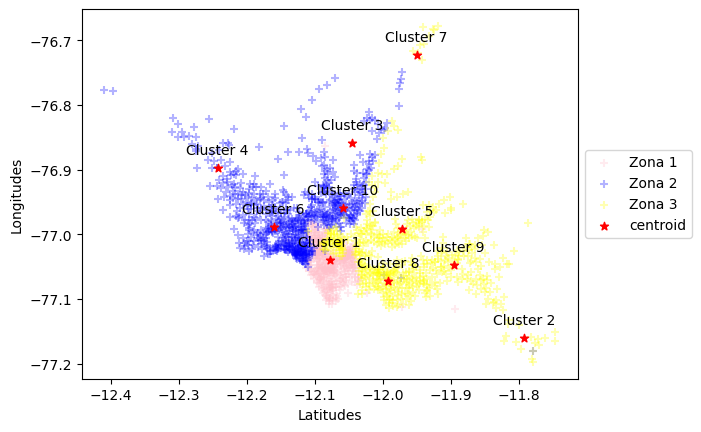

In [37]:
import matplotlib.pyplot as plt

# Assuming you have already defined dfb, dfc, dfd, and km as per your code
alpha_value = 0.3

plt.scatter(dfb['Latitud'], dfb['Longitud'], color='pink', label='Zona 1', marker='+', alpha=alpha_value)
plt.scatter(dfc['Latitud'], dfc['Longitud'], color='blue', label='Zona 2', marker='+', alpha=alpha_value)
plt.scatter(dfd['Latitud'], dfd['Longitud'], color='yellow', label='Zona 3', marker='+', alpha=alpha_value)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='red', marker='*', label='centroid')

# Add labels to each cluster's centroid
for i, centroid in enumerate(km.cluster_centers_):
    plt.annotate(f'Cluster {i + 1}', (centroid[0], centroid[1]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel('Latitudes')
plt.ylabel('Longitudes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [38]:
zona_cluster = ['zona 1','zona 3','zona 2','zona 2','zona 3','zona 2','zona 3','zona 3','zona 3','zona 2']
df_cluster_info['zona'] =zona_cluster

In [39]:
df_cluster_info

,Cluster,Latitud,Longitud,Cluster_Count,distancia_km,zona
0,0,-12.078665,-77.039309,1759,7.467001,zona 1
1,1,-11.792588,-77.160287,176,8.450761,zona 3
2,2,-12.045123,-76.858714,321,11.535173,zona 2
3,3,-12.243384,-76.896931,332,21.435486,zona 2
4,4,-11.971556,-76.992235,393,9.513741,zona 3
5,5,-12.161266,-76.988018,889,8.805730,zona 2
6,6,-11.950558,-76.722230,115,9.147556,zona 3
7,7,-11.992486,-77.072391,647,6.812810,zona 3
8,8,-11.896164,-77.046675,552,14.038824,zona 3
9,9,-12.059469,-76.959057,756,8.059173,zona 2


In [40]:
#Se exportan los excels

#excel con info de los clusters
df_cluster_info.to_excel('cluster_info.xlsx', index=False)
df.to_excel('incidencias_cluster.xlsx', index=False)

In [17]:
import pandas as pd
df = pd.read_excel('cluster_info.xlsx')

print(df.head())


   Cluster    Latitud   Longitud  Cluster_Count  distancia_km    zona
0        0 -12.078665 -77.039309           1759      7.467001  zona 1
1        1 -11.792588 -77.160287            176      8.450761  zona 3
2        2 -12.045123 -76.858714            321     11.535173  zona 2
3        3 -12.243384 -76.896931            332     21.435486  zona 2
4        4 -11.971556 -76.992235            393      9.513741  zona 3


In [18]:
df_zona1 = df[df['zona']=='zona 1']
df_zona2 = df[df['zona']=='zona 2']
df_zona3 = df[df['zona']=='zona 3']

In [24]:
df_zona2

,Cluster,Latitud,Longitud,Cluster_Count,distancia_km,zona
2,2,-12.045123,-76.858714,321,11.535173,zona 2
3,3,-12.243384,-76.896931,332,21.435486,zona 2
5,5,-12.161266,-76.988018,889,8.805730,zona 2
9,9,-12.059469,-76.959057,756,8.059173,zona 2


In [31]:
def calculate_middle_point(lat1, lon1, lat2, lon2):
    # Calculate the average latitude and longitude
    middle_lat = (lat1 + lat2) / 2
    middle_lon = (lon1 + lon2) / 2
    return middle_lat, middle_lon

# Example usage:
lat1 = -12.059469  # Latitude of point 1
lon1 = -76.959057  # Longitude of point 1

lat2 = -12.161266 # Latitude of point 2
lon2 = -76.988018  # Longitude of point 2

middle_lat_zone2, middle_lon_zone2 = calculate_middle_point(lat1, lon1, lat2, lon2)
print("Middle Point Latitude:", middle_lat_zone2)
print("Middle Point Longitude:", middle_lon_zone2)


Middle Point Latitude: -12.110367499999999
Middle Point Longitude: -76.97353749999999


In [32]:
df_zona3

,Cluster,Latitud,Longitud,Cluster_Count,distancia_km,zona
1,1,-11.792588,-77.160287,176,8.450761,zona 3
4,4,-11.971556,-76.992235,393,9.513741,zona 3
6,6,-11.950558,-76.722230,115,9.147556,zona 3
7,7,-11.992486,-77.072391,647,6.812810,zona 3
8,8,-11.896164,-77.046675,552,14.038824,zona 3


In [33]:
# Example usage:
lat1 = -11.896164  # Latitude of point 1
lon1 = -77.046675  # Longitude of point 1

lat2 = -11.992486 # Latitude of point 2
lon2 = -77.072391  # Longitude of point 2

middle_lat_zone3, middle_lon_zone3 = calculate_middle_point(lat1, lon1, lat2, lon2)
print("Middle Point Latitude:", middle_lat)
print("Middle Point Longitude:", middle_lon)

Middle Point Latitude: -11.944325
Middle Point Longitude: -77.05953299999999


In [34]:
df_zona1

,Cluster,Latitud,Longitud,Cluster_Count,distancia_km,zona
0,0,-12.078665,-77.039309,1759,7.467001,zona 1


In [40]:
import pandas as pd

# Create a list of data containing latitude, longitude, and zone
data = [
    {"Latitude": -12.078665, "Longitude": -77.039309, "Zone": "Zone1"},
    {"Latitude": middle_lat_zone2, "Longitude": middle_lon_zone2, "Zone": "Zone2"},
    {"Latitude": middle_lat_zone3, "Longitude": middle_lon_zone3, "Zone": "Zone3"},
    # Add more data as needed
]

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_excel('location_final_data.xlsx', index=False)

In [37]:
df

,Latitude,Longitude,Zone
0,-12.078665,-77.039309,Zone1
1,-12.110367,-76.973537,Zone2
2,-11.944325,-77.059533,Zone3


In [4]:
import pandas as pd
df = pd.read_excel('location_final_data.xlsx')
print(df.head())

    Latitude  Longitude              Zone  Distancia 
0 -12.078665 -77.039309             Zone1         NaN
1 -12.110368 -76.973537             Zone2         NaN
2 -11.944325 -77.059533             Zone3         NaN
3 -12.064185 -76.968248          Base Ate         NaN
4 -12.067660 -77.038350  Base Jesus Maria         NaN


In [14]:
import math
def haversine_distance(lat1, lon1, lat2, lon2):
  
    earth_radius = 6371.0
    
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance = earth_radius * c
    
    return distance

In [20]:
df

,Latitude,Longitude,Zone,Distancia
0,-12.078665,-77.039309,Zone1,NaN
1,-12.110368,-76.973537,Zone2,NaN
2,-11.944325,-77.059533,Zone3,NaN
3,-12.064185,-76.968248,Base Ate,NaN
4,-12.067660,-77.038350,Base Jesus Maria,NaN
5,-11.973614,-77.088940,Base Norte,NaN


In [18]:
row_1 = df.iloc[0]
row_2 = df.iloc[4]
zone1_distance = haversine_distance(row_1['Latitude'],row_1['Longitude'], row_2['Latitude'], row_2['Longitude'])
zone1_distance

1.2281351119689559

In [21]:
row_1 = df.iloc[1]
row_2 = df.iloc[3]
zone2_distance = haversine_distance(row_1['Latitude'],row_1['Longitude'], row_2['Latitude'], row_2['Longitude'])
zone2_distance

5.167319904331537

In [22]:
row_1 = df.iloc[2]
row_2 = df.iloc[5]
zone1_distance = haversine_distance(row_1['Latitude'],row_1['Longitude'], row_2['Latitude'], row_2['Longitude'])
zone1_distance

4.565072345127004